# Biobank data analysis - clustering
## Clustering with differnent distance measures

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
import matplotlib.cm as cm
import matplotlib.animation as animation
import datetime
from dateutil.relativedelta import relativedelta
#import imblearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as skm
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# import data
df = pd.read_csv(r'./df_cluster_encoded_result.csv')

# drop last two columns
df = df.drop( columns=['kmedoid_cluster', 'kmeans_cluster',
                       '21003-2.0', '31-0.0']  )
print( df.shape )
df.head()

(5772, 46)


,eid,20458-0.0,20459-0.0,20460-0.0,20479-0.0,20485-0.0,20495-0.0,20497-0.0,20498-0.0,20505-0.0,...,21052-0.0,21053-0.0,21054-0.0,21055-0.0,21056-0.0,21057-0.0,21058-0.0,21059-0.0,21060-0.0,21061-0.0
0,1000993,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0
1,1001367,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,1003110,1.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
3,1003823,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
4,1004315,3.0,4.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0,...,2.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,0.0,1.0


In [2]:
# checking columns
df.columns

Index(['eid', '20458-0.0', '20459-0.0', '20460-0.0', '20479-0.0', '20485-0.0',
       '20495-0.0', '20497-0.0', '20498-0.0', '20505-0.0', '20506-0.0',
       '20507-0.0', '20508-0.0', '20509-0.0', '20510-0.0', '20511-0.0',
       '20512-0.0', '20513-0.0', '20514-0.0', '20515-0.0', '20516-0.0',
       '20517-0.0', '20518-0.0', '20519-0.0', '20520-0.0', '21025-0.0',
       '21033-0.0', '21034-0.0', '21040-0.0', '21041-0.0', '21042-0.0',
       '21043-0.0', '21044-0.0', '21048-0.0', '21049-0.0', '21051-0.0',
       '21052-0.0', '21053-0.0', '21054-0.0', '21055-0.0', '21056-0.0',
       '21057-0.0', '21058-0.0', '21059-0.0', '21060-0.0', '21061-0.0'],
      dtype='object')

In [4]:
# minmax scaler
min_max_scaler = MinMaxScaler()
df_mm = pd.DataFrame( min_max_scaler.fit_transform( df.drop(columns=['eid']) ) )

#0. Indexing
  # since this df was saved WITH the index, we have to re-assign it as the index and drop it from the columns
df_mm.set_index( df['eid'],inplace=True)

# 1. replacing column names
df_mm = df_mm.set_axis( [ '20458-0.0', '20459-0.0', '20460-0.0', '20479-0.0',
       '20485-0.0', '20495-0.0', '20497-0.0', '20498-0.0', '20505-0.0',
       '20506-0.0', '20507-0.0', '20508-0.0', '20509-0.0', '20510-0.0',
       '20511-0.0', '20512-0.0', '20513-0.0', '20514-0.0', '20515-0.0',
       '20516-0.0', '20517-0.0', '20518-0.0', '20519-0.0', '20520-0.0',
       '21025-0.0', '21033-0.0', '21034-0.0', '21040-0.0', '21041-0.0',
       '21042-0.0', '21043-0.0', '21044-0.0', '21048-0.0', '21049-0.0',
       '21051-0.0', '21052-0.0', '21053-0.0', '21054-0.0', '21055-0.0',
       '21056-0.0', '21057-0.0', '21058-0.0', '21059-0.0', '21060-0.0',
       '21061-0.0'], axis=1, inplace=False)

print(df_mm.shape)
df_mm.head()

(5772, 45)


,20458-0.0,20459-0.0,20460-0.0,20479-0.0,20485-0.0,20495-0.0,20497-0.0,20498-0.0,20505-0.0,20506-0.0,...,21052-0.0,21053-0.0,21054-0.0,21055-0.0,21056-0.0,21057-0.0,21058-0.0,21059-0.0,21060-0.0,21061-0.0
eid,,,,,,,,,,,,,,,,,,,,,
1000993,0.2,0.2,0.75,0.0,0.0,0.00,0.0,0.00,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,0.666667,0.5,1.0,0.5,0.5
1001367,0.2,0.2,0.75,0.0,0.0,0.00,0.0,0.00,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,0.666667,1.0,1.0,1.0,1.0
1003110,0.2,0.4,0.50,1.0,0.5,0.25,0.0,0.00,0.333333,0.333333,...,1.0,1.0,1.0,1.0,1.0,0.666667,1.0,1.0,1.0,0.5
1003823,0.2,0.0,0.75,0.0,0.0,0.00,0.0,0.25,0.000000,0.000000,...,0.5,1.0,1.0,1.0,1.0,0.666667,1.0,1.0,0.5,0.5
1004315,0.6,0.8,0.50,1.0,1.0,0.00,0.0,0.00,0.666667,0.333333,...,1.0,0.5,1.0,0.5,0.5,1.000000,1.0,0.5,0.0,0.5


In [5]:
# 2. plotting
# Run hierarchical clustering on this subset with Euclidean distance as the dissimilarity measure.

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import distance
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt
from scipy.spatial import distance_matrix

# Plot the dendrogram for single, complete and average linkages.
s_linkage = linkage(df_mm, 'single', 'euclidean') 
c_linkage = linkage(df_mm, 'complete','euclidean') 
a_linkage = linkage(df_mm, 'average','euclidean') 

#fig = plt.figure(figsize=(20, 10))
#plt.subplot(1, 3, 1)
#dendrogram(s_linkage)
#plt.subplot(1, 3, 2)
#dendrogram(c_linkage)
#plt.subplot(1, 3, 3)
#dendrogram(a_linkage)
#plt.show()


## List of Distance measures

*   “euclidean”: sqrt(sum((x - y)^2))
*   “manhattan” : sum(|x - y|)
*   “minkowski” : sum(|x - y|^p)^(1/p)
*   “wminkowski” : sum(|w * (x - y)|^p)^(1/p)
*   “seuclidean” : sqrt(sum((x - y)^2 / V))
*   “mahalanobis” : sqrt((x - y)' V^-1 (x - y))

pip install --upgrade ipython# 1. Euclidean distance measure
### 1-A. single linkage 
### 1-B. complete linkage 
### 1-C. average linkage 

In [7]:
#pip install --upgrade ipython

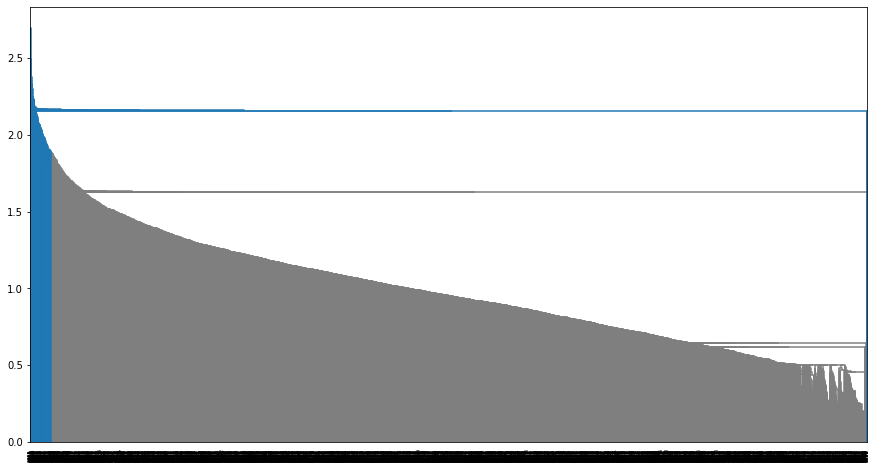

In [5]:
# Plot the dendrogram for single, complete and average linkages.
import sys
sys.setrecursionlimit(100000) # increase limit due to crash error

s_linkage = linkage(df_mm, 'single', 'euclidean') 

fig = plt.figure(figsize=(15, 8))
dn = dendrogram(s_linkage)
plt.show()

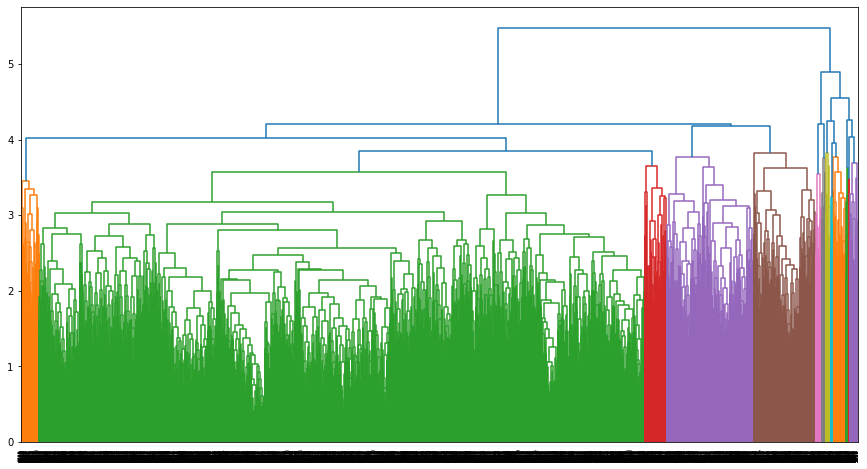

In [5]:
c_linkage = linkage(df_mm, 'complete','euclidean') 
fig = plt.figure(figsize=(15, 8))
dn = dendrogram(c_linkage)
plt.show()

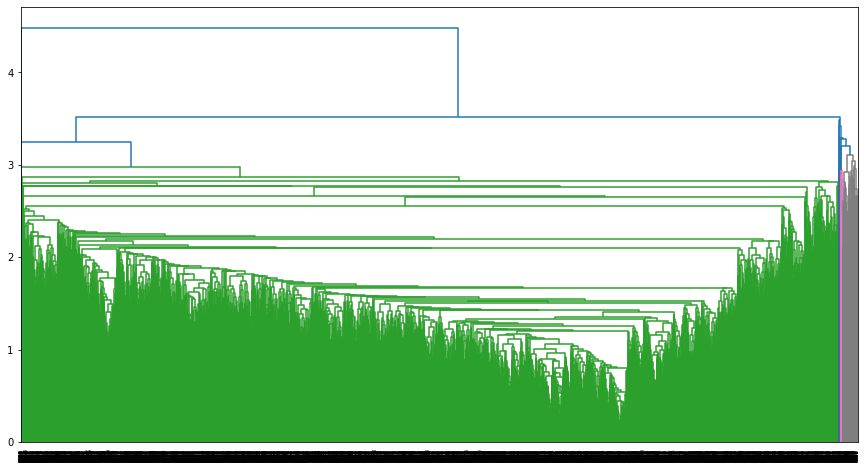

In [6]:
a_linkage = linkage(df_mm, 'average','euclidean') 
fig = plt.figure(figsize=(15, 8))
dn = dendrogram(a_linkage)
plt.show()

# 2. Cosine distance measure
### 2-A. single linkage 
### 2-B. complete linkage 
### 2-C. average linkage 

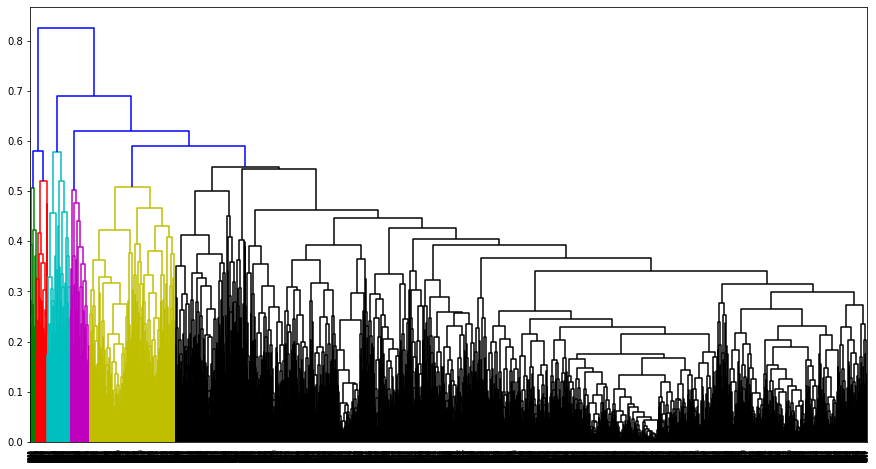

In [ ]:
# It seems that complete linkage works great
# lets try with different distance measure

c2_linkage = linkage(df_mm, 'complete', 'cosine') 
fig = plt.figure(figsize=(15, 8))
dn = dendrogram(c2_linkage)
plt.show()

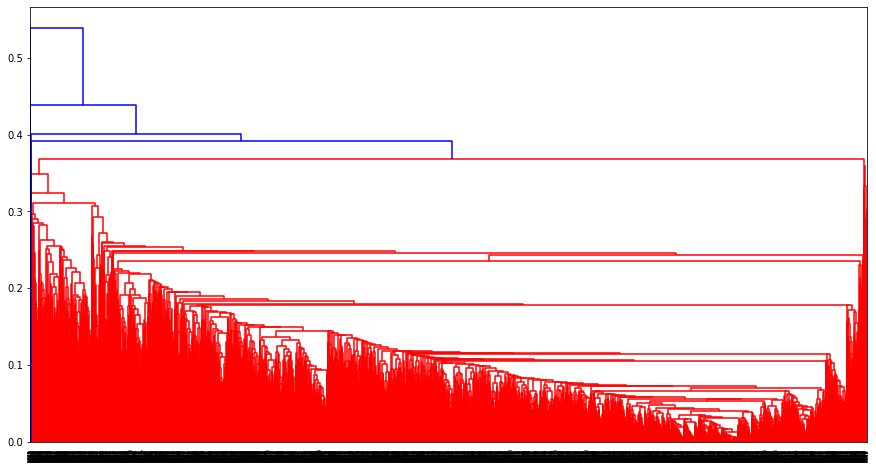

In [ ]:
a2_linkage = linkage(df_mm, 'average','cosine') 
fig = plt.figure(figsize=(15, 8))
dn = dendrogram(a2_linkage)
plt.show()

# 3. Pearson distance measure
### 3-A. single linkage 
### 3-B. complete linkage 
### 3-C. average linkage 

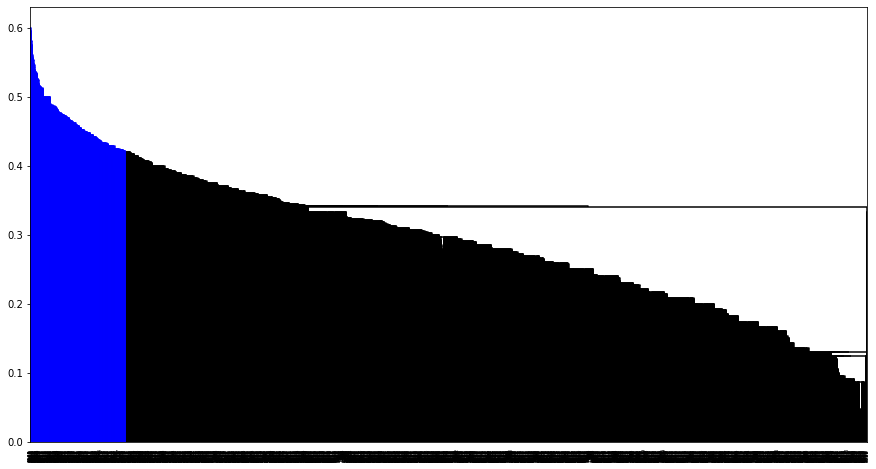

In [ ]:
s3_linkage = linkage(df_mm, 'single', 'jaccard') 
fig = plt.figure(figsize=(15, 8))
dn = dendrogram(s3_linkage)
plt.show()

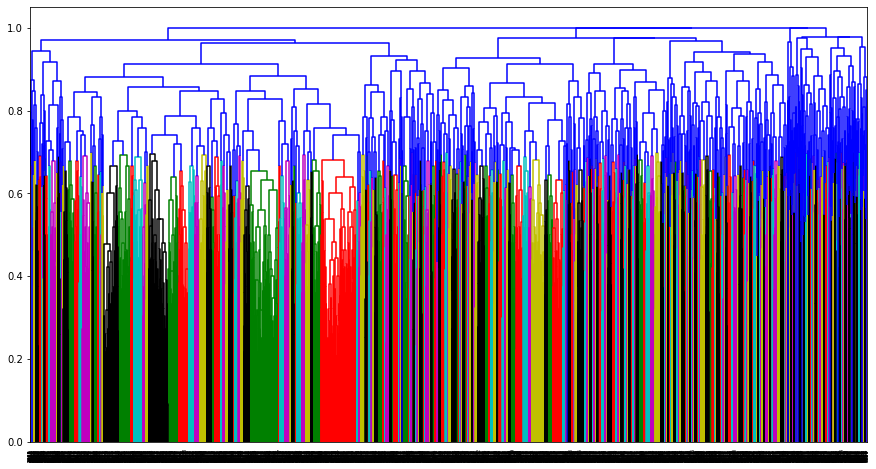

In [ ]:
c3_linkage = linkage(df_mm, 'complete', 'jaccard') 
fig = plt.figure(figsize=(15, 8))
dn = dendrogram(c3_linkage)
plt.show()

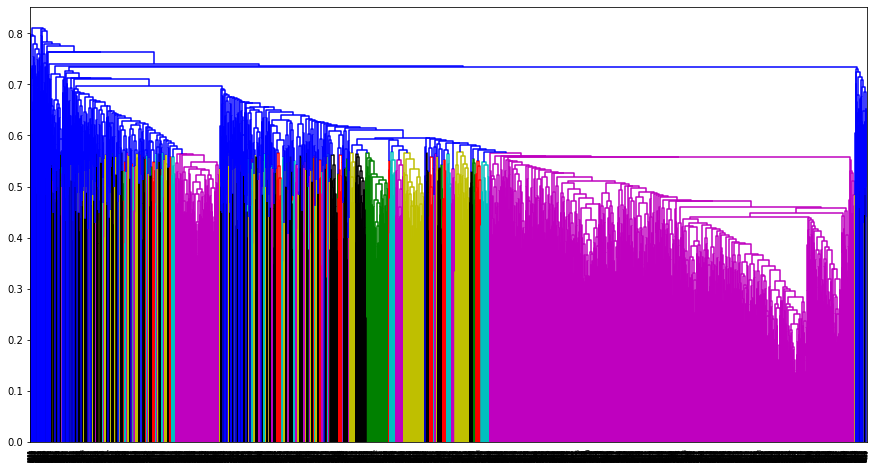

In [ ]:
a3_linkage = linkage(df_mm, 'average','jaccard') 
fig = plt.figure(figsize=(15, 8))
dn = dendrogram(a3_linkage)
plt.show()

# 4. Manhattan distance measure
### 4-A. single linkage 
### 4-B. complete linkage 
### 4-C. average linkage 

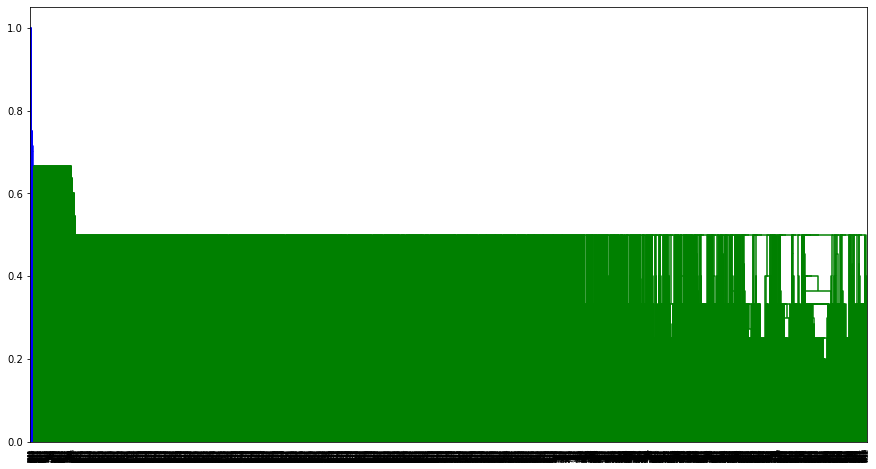

In [ ]:
s4_linkage = linkage(df_mm, 'single', 'chebyshev') 
fig = plt.figure(figsize=(15, 8))
dn = dendrogram(s4_linkage)
plt.show()

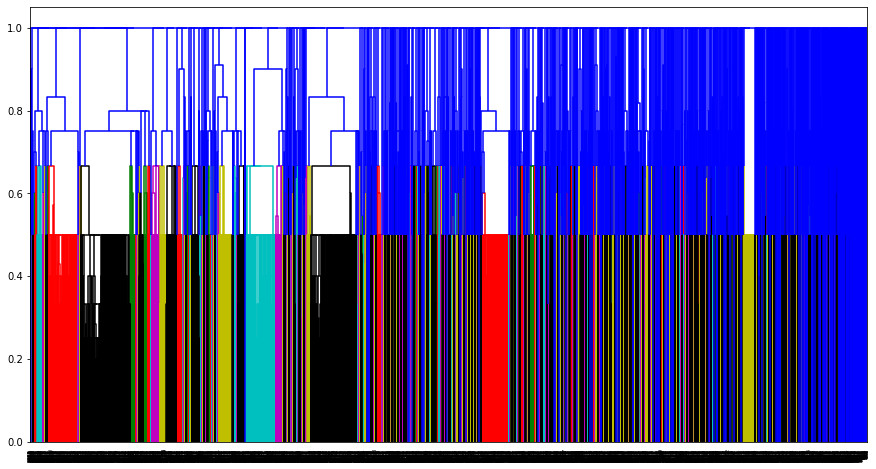

In [ ]:
c4_linkage = linkage(df_mm, 'complete', 'chebyshev') 
fig = plt.figure(figsize=(15, 8))
dn = dendrogram(c4_linkage)
plt.show()

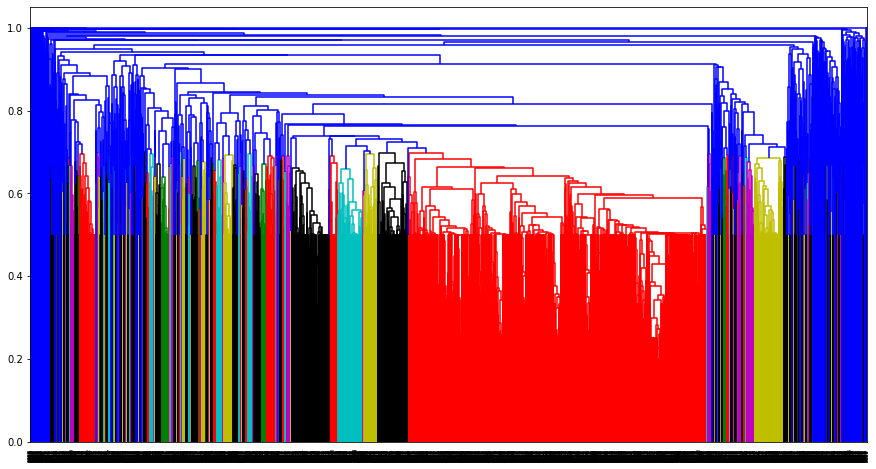

In [ ]:
a4_linkage = linkage(df_mm, 'average','chebyshev') 
fig = plt.figure(figsize=(15, 8))
dn = dendrogram(a4_linkage)
plt.show()

# 5. Mahalanobis distance measure
### 5-A. single linkage 
### 5-B. complete linkage 
### 5-C. average linkage 

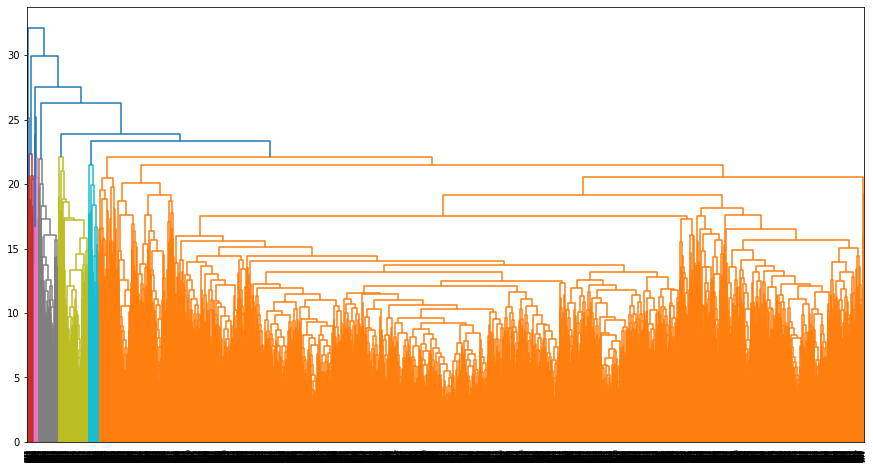

In [8]:
c5_linkage = linkage(df_mm, 'complete', 'mahalanobis') 
fig = plt.figure(figsize=(15, 8))
dn = dendrogram(c5_linkage)
plt.show()

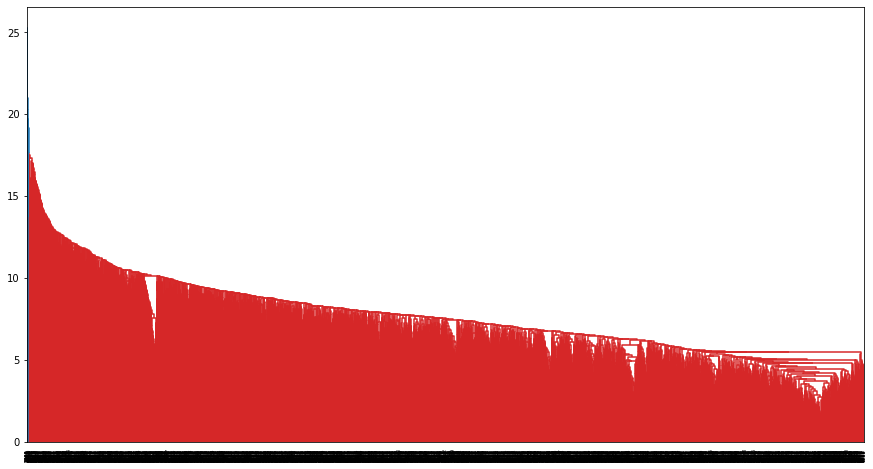

In [9]:
a5_linkage = linkage(df_mm, 'average','mahalanobis') 
fig = plt.figure(figsize=(15, 8))
dn = dendrogram(a5_linkage)
plt.show()


# 6. Minkowski distance measure
### 6-A. single linkage 
### 6-B. complete linkage 
### 6-C. average linkage 

1) The y-axis is a measure of closeness of either individual data points or clusters.

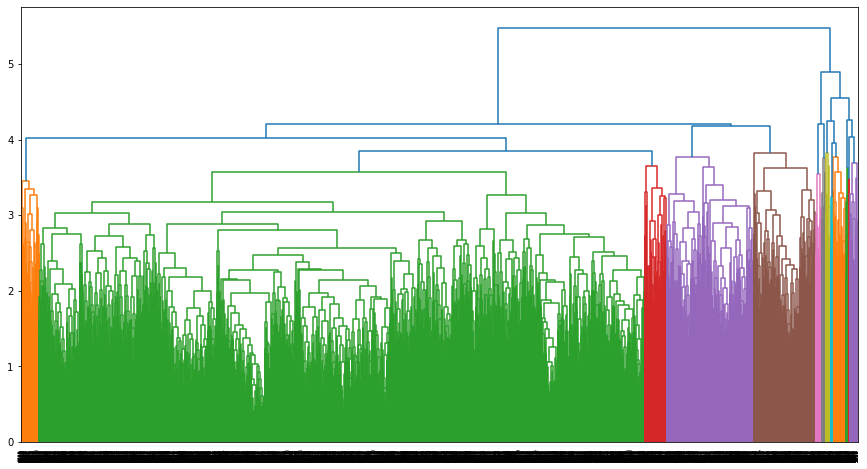

In [6]:
c6_linkage = linkage(df_mm, 'complete', 'minkowski') 
fig = plt.figure(figsize=(15, 8))
dn = dendrogram(c6_linkage)
plt.show()

In [ ]:
c6w_linkage = linkage(df_mm, 'ward', 'euclidean') 
fig = plt.figure(figsize=(15, 8))
dn = dendrogram(c6w_linkage)
plt.show()

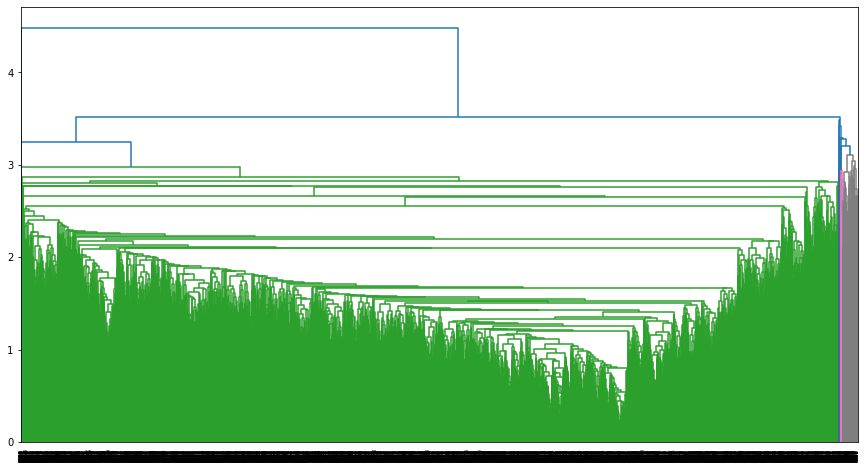

In [7]:
a6_linkage = linkage(df_mm, 'average', 'minkowski') 
fig = plt.figure(figsize=(15, 8))
dn = dendrogram(a6_linkage)
plt.show()